In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
S05_path = 'C:/Users/Tomar/dev/vehicle_indoor_comfort/summer_2023/output/process_data/S05_final_df.csv'

S05_df = pd.read_csv(S05_path, index_col=False, parse_dates=['DateTime'])

# Set 'DateTime' column as the index
S05_df.set_index('DateTime', inplace=True)

# Display the DataFrame
print(S05_df)

                    ID_instance     hrv_vlf      hrv_lf      hrv_hf  \
DateTime                                                              
2023-08-29 07:06:57       S05_1  186.193957  231.562917  585.580975   
2023-08-29 07:06:58       S05_1  186.268520  231.652527  585.785605   
2023-08-29 07:06:59       S05_1  186.343084  231.742136  585.990234   
2023-08-29 07:07:00       S05_1  186.417648  231.831745  586.194863   
2023-08-29 07:07:01       S05_1  186.492211  231.921355  586.399492   
...                         ...         ...         ...         ...   
2023-09-05 06:56:17       S05_4   21.632308  292.124769   82.295156   
2023-09-05 06:56:18       S05_4   21.632308  292.124769   82.295156   
2023-09-05 06:56:19       S05_4   21.632308  292.124769   82.295156   
2023-09-05 06:56:20       S05_4   21.632308  292.124769   82.295156   
2023-09-05 06:56:21       S05_4   21.632308  292.124769   82.295156   

                      hrv_sdnn  hrv_rmssd  hrv_mean_nni  hrv_median_nni  \
D

In [3]:
# Group by 'id_instance' and calculate time duration
time_duration = S05_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())

# Convert time duration to seconds for better readability (optional)
time_duration = (time_duration.dt.total_seconds()/60).round(2)
# time_duration = time_duration.round(2)

print(time_duration)

ID_instance
S05_1    10.07
S05_2     7.88
S05_3     9.55
S05_4    22.30
dtype: float64


C:\Users\Tomar\AppData\Local\Temp\ipykernel_33864\2001208054.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_duration = S05_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())


In [4]:
instances_over_60_minutes = time_duration[time_duration > 60].index

# Remove rows corresponding to instances over 60 minutes inplace
S05_df.drop(S05_df[S05_df['ID_instance'].isin(instances_over_60_minutes)].index, inplace=True)


In [5]:
S05_df.isnull().sum()

ID_instance          3
hrv_vlf              0
hrv_lf               0
hrv_hf               0
hrv_sdnn             0
hrv_rmssd            0
hrv_mean_nni         0
hrv_median_nni       0
hrv_range_nni        0
hrv_entropy          0
eda_tonic_mean       0
eda_tonic_std        0
eda_tonic_sum        0
eda_tonic_energy     0
eda_phasic_mean      0
eda_phasic_std       0
eda_phasic_sum       0
eda_phasic_energy    0
acc_acc_x_min        0
acc_acc_y_min        0
acc_acc_z_min        0
acc_l2_min           0
acc_acc_x_max        0
acc_acc_y_max        0
acc_acc_z_max        0
acc_l2_max           0
acc_acc_x_ptp        0
acc_acc_y_ptp        0
acc_acc_z_ptp        0
acc_l2_ptp           0
Temp(C)_N1           0
RH(%)_N1             0
Dewpoint(C)_N1       0
Temp(C)_N2           0
RH(%)_N2             0
Dewpoint(C)_N2       0
Temp(C)_N3           0
RH(%)_N3             0
Dewpoint(C)_N3       0
Temp(C)_N4           0
RH(%)_N4             0
Dewpoint(C)_N4       0
Temp(C)_N5           0
RH(%)_N5   

In [6]:
S05_df.dropna(subset=['ID_instance'], inplace=True)

In [7]:
S05_df['ID_instance'].unique()

array(['S05_1', 'S05_2', 'S05_3', 'S05_4'], dtype=object)

In [9]:
# Selecting physiological features (excluding Subject and Commuting columns)
physiological_data = S05_df.columns[1:18] 

# Selecting environmental parameters
environmental_data = S05_df.columns[30:42] 

# Calculating correlation matrix
correlation_matrix = S05_df[list(physiological_data) + list(environmental_data)].corr(method='spearman')

# Extracting correlations between physiological features and environmental parameters
correlation_phys_env = correlation_matrix.loc[physiological_data, environmental_data]

correlation_phys_env


,Temp(C)_N1,RH(%)_N1,Dewpoint(C)_N1,Temp(C)_N2,RH(%)_N2,Dewpoint(C)_N2,Temp(C)_N3,RH(%)_N3,Dewpoint(C)_N3,Temp(C)_N4,RH(%)_N4,Dewpoint(C)_N4
hrv_vlf,0.417898,-0.217759,-0.142963,0.408581,-0.142696,-0.042965,0.426059,-0.083974,0.011426,0.305162,-0.065480,0.054450
hrv_lf,0.264581,-0.117613,-0.057077,0.279585,-0.089129,-0.007171,0.291050,-0.539468,-0.481211,0.180358,0.007692,0.092741
hrv_hf,0.266583,-0.048192,0.042734,0.253024,0.063078,0.189863,0.267310,-0.155409,-0.044499,0.140390,0.115474,0.255834
hrv_sdnn,0.260107,-0.018205,0.074467,0.251729,0.070734,0.194056,0.261846,-0.226906,-0.122087,0.099641,0.164579,0.288123
hrv_rmssd,0.173294,0.089043,0.188398,0.163038,0.178082,0.305518,0.167759,-0.276194,-0.163554,-0.009255,0.281747,0.408593
hrv_mean_nni,0.111384,0.173983,0.264887,0.111459,0.260799,0.380301,0.106798,-0.359400,-0.261670,-0.082206,0.322617,0.441571
hrv_median_nni,0.135593,0.147609,0.237539,0.139854,0.242181,0.365931,0.137627,-0.365748,-0.266624,-0.050461,0.296552,0.422371
hrv_range_nni,0.252048,-0.030129,0.056298,0.245219,0.059102,0.174490,0.256170,-0.285788,-0.185668,0.116873,0.144997,0.268795
hrv_entropy,-0.174862,-0.056455,-0.130230,-0.177902,-0.128250,-0.232920,-0.179127,0.539445,0.456080,-0.028738,-0.176052,-0.297177
eda_tonic_mean,-0.631498,0.662424,0.641985,-0.622434,0.689081,0.667169,-0.625723,-0.426525,-0.456087,-0.664522,0.676697,0.670187


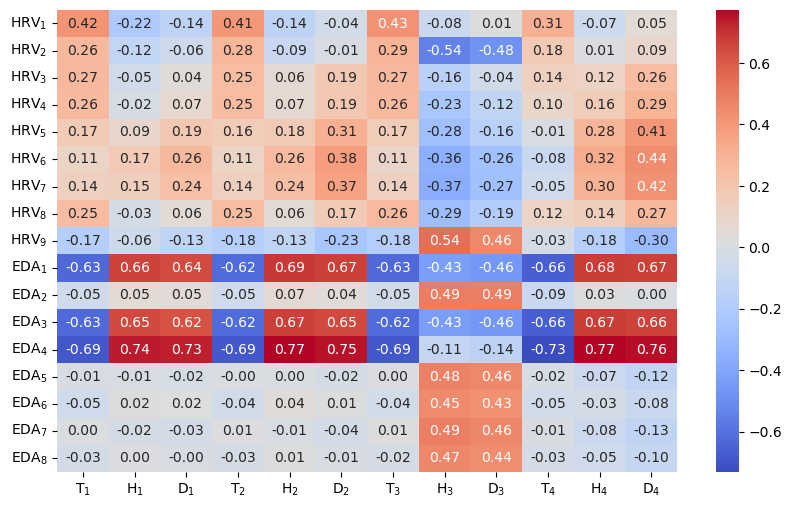

In [11]:
# Define the new column names with LaTeX subscript representation
new_column_names = {
    'Temp(C)_N1': 'T$_{1}$',
    'RH(%)_N1': 'H$_{1}$',
    'Dewpoint(C)_N1': 'D$_{1}$',
    'Temp(C)_N2': 'T$_{2}$',
    'RH(%)_N2': 'H$_{2}$',
    'Dewpoint(C)_N2': 'D$_{2}$',
    'Temp(C)_N3': 'T$_{3}$',
    'RH(%)_N3': 'H$_{3}$',
    'Dewpoint(C)_N3': 'D$_{3}$',
    'Temp(C)_N4': 'T$_{4}$',
    'RH(%)_N4': 'H$_{4}$',
    'Dewpoint(C)_N4': 'D$_{4}$',

    'hrv_vlf': 'HRV$_1$',
    'hrv_lf': 'HRV$_2$',
    'hrv_hf': 'HRV$_3$',
    'hrv_sdnn': 'HRV$_4$',
    'hrv_rmssd': 'HRV$_5$',
    'hrv_mean_nni': 'HRV$_6$',
    'hrv_median_nni': 'HRV$_7$',
    'hrv_range_nni': 'HRV$_8$',
    'hrv_entropy': 'HRV$_9$',

    'eda_tonic_mean': 'EDA$_1$',
    'eda_tonic_std': 'EDA$_2$',
    'eda_tonic_sum': 'EDA$_3$',
    'eda_tonic_energy': 'EDA$_4$',
    'eda_phasic_mean': 'EDA$_5$',
    'eda_phasic_std': 'EDA$_6$',
    'eda_phasic_sum': 'EDA$_7$',
    'eda_phasic_energy': 'EDA$_8$',

    # 'acc_acc_x_min': 'ACC$_1$',
    # 'acc_acc_y_min': 'ACC$_2$' ,
    # 'acc_acc_z_min': 'ACC$_3$', 
    # 'acc_l2_min': 'ACC$_4$',
    # 'acc_acc_x_max': 'ACC$_5$',
    # 'acc_acc_y_max': 'ACC$_6$', 
    # 'acc_acc_z_max': 'ACC$_7$', 
    # 'acc_l2_max': 'ACC$_8$',
    # 'acc_acc_x_ptp': 'ACC$_9$', 
    # 'acc_acc_y_ptp': 'ACC$_{10}$', 
    # 'acc_acc_z_ptp': 'ACC$_{11}$', 
    # 'acc_l2_ptp': 'ACC$_{12}$'
}

# Rename columns
correlation_phys_env_renamed = correlation_phys_env.rename(columns=new_column_names, index=new_column_names)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_phys_env_renamed, annot=True, cmap='coolwarm', fmt=".2f")

# Add titles and labels
# plt.title('S05')
# plt.xlabel('environmental parameters', fontsize=14)
# plt.ylabel('physiological features', fontsize=14)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)
plt.xticks(rotation=0)

# Save the plot as eps & png file
outpath = 'C:/Users/Tomar/dev/vehicle_indoor_comfort/summer_2023/output/viz/'
plt.savefig(outpath+'S05_heatmap.eps', format='eps', bbox_inches='tight')
plt.savefig(outpath+'S05_heatmap.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


In [12]:
# Drop columns starting with 'acc_'
data = S05_df.filter(regex='^(?!acc_)')

In [8]:
# List of all physiological variables
physio_vars = ['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
               'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
               'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
               'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy']

# Environmental variables to consider
env_vars = ['Temp(C)_N1', 'RH(%)_N1']

# Compute Spearman correlations
correlations = data[physio_vars + env_vars].corr(method='spearman')

# HRV and EDA groups for correlation
hrv_vars = physio_vars[:9]  # Assuming the first 9 are HRV related
eda_vars = physio_vars[9:]  # Assuming the rest are EDA related

# Identify one HRV and one EDA variable with the strongest correlation with any environmental variable
strongest_corr_hrv = correlations.loc[hrv_vars, env_vars].abs().max().idxmax()
strongest_corr_eda = correlations.loc[eda_vars, env_vars].abs().max().idxmax()

# Extract the specific HRV and EDA variable names with the highest correlation
strongest_corr_hrv_var = correlations.loc[hrv_vars, env_vars].abs().idxmax()[strongest_corr_hrv]
strongest_corr_eda_var = correlations.loc[eda_vars, env_vars].abs().idxmax()[strongest_corr_eda]

# Define thresholds using the identified variables and adjusted quartiles for environmental variables
thresholds = {
    strongest_corr_hrv_var: data[strongest_corr_hrv_var].quantile(0.75),
    strongest_corr_eda_var: data[strongest_corr_eda_var].quantile(0.25),
    'Temp(C)_N1': [data['Temp(C)_N1'].quantile(0.30), data['Temp(C)_N1'].quantile(0.65)],
    'RH(%)_N1': [data['RH(%)_N1'].quantile(0.30), data['RH(%)_N1'].quantile(0.65)]
}

# Define the comfort function
def comfort_label(row):
    comfort = (row[strongest_corr_hrv_var] >= thresholds[strongest_corr_hrv_var] and
               row[strongest_corr_eda_var] <= thresholds[strongest_corr_eda_var] and
               thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1] and
               thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1])
    
    if comfort:
        return 1
    
    discomfort = (row[strongest_corr_hrv_var] < thresholds[strongest_corr_hrv_var] and
                  row[strongest_corr_eda_var] > thresholds[strongest_corr_eda_var] and
                  not (thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1]) or
                  not (thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1]))
    
    if discomfort:
        return 0
    
    return -1  # Sensible label for ambiguous cases

# Apply the comfort function and count labels
data['lambda'] = data.apply(comfort_label, axis=1)
label_counts = data['lambda'].value_counts(normalize=True) * 100

# Print the names of variables used for the comfort function
print("Variables considered for the comfort function:")
print(f"HRV Variable: {strongest_corr_hrv_var}")
print(f"EDA Variable: {strongest_corr_eda_var}")
print("Environmental Variables: Temp(C)_N1, RH(%)_N1")

# Print the percentage of labeled values
print("Label Distribution (%):")
print(label_counts)


Variables considered for the comfort function:
HRV Variable: hrv_vlf
EDA Variable: eda_tonic_energy
Environmental Variables: Temp(C)_N1, RH(%)_N1
Label Distribution (%):
lambda
 0    60.360963
-1    39.639037
Name: proportion, dtype: float64
